* used for classificatin
* Used for regression
* also , for outlier detection

* plot data in a n-dim plane. Each data is represented as a vector
* we than find a hyper plane that separates two classes

### how to find the hyper-plane ###
* Among the posibility of multiple hyper-planes,find the one with best cast
* Maximize the distance between nearest data point of suppot vector
* A feature to data when they are dificult to separete,and then create a plane to separete the data.this is also known as kernel trick

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np 

In [3]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor = .1 , noise =.1)

### prez face classification using PCA & SVM ###

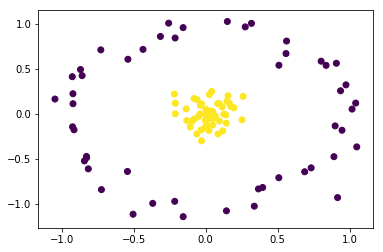

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.svm import SVC

In [6]:
clf = SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.score(X,y)

0.66000000000000003

In [8]:
clf=SVC(kernel='rbf')
clf.fit(X,y)
clf.score(X,y)

1.0

In [9]:
from sklearn.datasets import fetch_lfw_people

In [10]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [12]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'],
      dtype='<U17')

In [13]:
faces.images.shape

(1348, 62, 47)

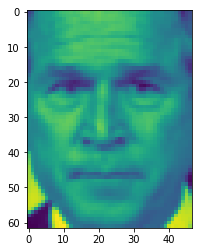

In [14]:
plt.imshow(faces.images[3])

In [15]:
faces.target[2]

3

In [16]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.pipeline import make_pipeline

In [37]:
pca =PCA(svd_solver='randomized', n_components= 150)

In [38]:
svc = SVC(kernel='rbf')

In [39]:
model = make_pipeline(pca,svc)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
trainX,testX,trainY,testY= train_test_split(faces.data,faces.target)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid ={'svc__C':[1,5,10,50],
           'svc__gamma':[0.0001,0.0005,0.001,0.005]}

In [44]:
grid = GridSearchCV(model, param_grid)

In [45]:
grid.fit(trainX,trainY)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid.score(testX,testY)

0.36498516320474778

In [47]:
grid.best_params_


{'svc__C': 1, 'svc__gamma': 0.0001}